In [1]:
import keras
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Conv2D, Flatten, MaxPooling2D
from keras.optimizers import RMSprop
from keras.models import Sequential
import matplotlib.pyplot as plt

import os
os.environ['KMP_DUPLICATE_LIB_OK']='TRUE'

Using TensorFlow backend.


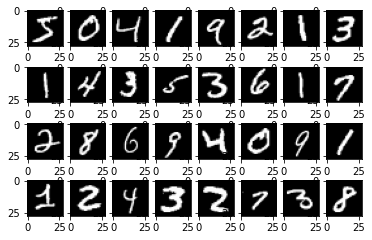

In [2]:
# MNISTデータ読み込み
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# データを4x8に出力
for i in range(0, 32):
    plt.subplot(4, 8, i + 1)
    plt.imshow(X_train[i], cmap="gray")
    
plt.show()

In [3]:
# # データを28x28=784の一次元配列に変換
# X_train = X_train.reshape(-1, 784).astype("float32") / 255
# X_test = X_test.reshape(-1, 784).astype("float32") / 255

# # データを確認
# X_train

In [4]:
# # ラベルデータをOne-Hotベクトルに変換
# y_train = keras.utils.to_categorical(y_train.astype("int32"), 10)
# y_test = keras.utils.to_categorical(y_test.astype("int32"), 10)

In [5]:
# # 入力と出力を指定
# in_size = 28 * 28
# out_size = 10

# # モデルの構造を定義
# model = Sequential()
# model.add(Dense(512, activation="relu", input_shape=(in_size,)))
# model.add(Dense(out_size, activation="softmax"))

# # モデルを構築
# model.compile(
#     loss="categorical_crossentropy",
#     optimizer="adam", 
#     metrics=["accuracy"]
# )

# # 学習を実行
# model.fit(X_train, y_train, batch_size=20, epochs=20)

# # モデルを評価
# score = model.evaluate(X_test, y_test, verbose=1)
# print(f"正解率={score[1]}, loss={score[0]}")

# 改良

In [6]:
# # 入力と出力を指定
# in_size = 28 * 28
# out_size = 10

# # モデルの構造を定義
# model = Sequential()
# model.add(Dense(512, activation="relu", input_shape=(in_size,)))
# model.add(Dropout(0.2))
# model.add(Dense(512, activation="relu"))
# model.add(Dropout(0.2))
# model.add(Dense(out_size, activation="softmax"))

# # モデルを構築
# model.compile(
#     loss="categorical_crossentropy",
#     optimizer=RMSprop(),
#     metrics=["accuracy"]
# )

# # 学習を実行
# model.fit(X_train, y_train, batch_size=20, epochs=20)

# # モデルを評価
# score = model.evaluate(X_test, y_test, verbose=1)
# print(f"正解率={score[1]}, loss={score[0]}")

# # 正解率の推移をプロット
# plt.plot(hist.history["accuracy"])
# plt.plot(hist.history["val_accuracy"])
# plt.title("Accuracy")
# plt.legend(["train", "test"], loc="upper left")
# plt.show()

# # ロスの推移をプロット
# plt.plot(hist.history["loss"])
# plt.plot(hist.history["val_loss"])
# plt.title("Loss")
# plt.legend(["train", "test"], loc="upper left")
# plt.show()

# さらに改良

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 296s 5ms/step - loss: 0.2260 - accuracy: 0.9315 - val_loss: 0.0519 - val_accuracy: 0.9833
Epoch 2/12
60000/60000 [==============================] - 293s 5ms/step - loss: 0.0806 - accuracy: 0.9758 - val_loss: 0.0417 - val_accuracy: 0.9863
Epoch 3/12
60000/60000 [==============================] - 321s 5ms/step - loss: 0.0618 - accuracy: 0.9818 - val_loss: 0.0371 - val_accuracy: 0.9874
Epoch 4/12
60000/60000 [==============================] - 367s 6ms/step - loss: 0.0526 - accuracy: 0.9847 - val_loss: 0.0359 - val_accuracy: 0.9887
Epoch 5/12
60000/60000 [==============================] - 291s 5ms/step - loss: 0.0457 - accuracy: 0.9866 - val_loss: 0.0376 - val_accuracy: 0.9889
Epoch 6/12
60000/60000 [==============================] - 292s 5ms/step - loss: 0.0426 - accuracy: 0.9872 - val_loss: 0.0358 - val_accuracy: 0.9889
Epoch 7/12
60000/60000 [==============================] - 292s

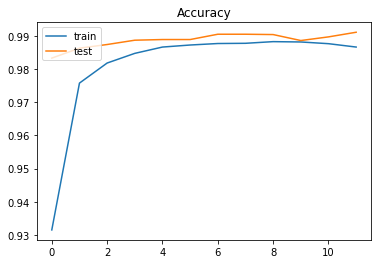

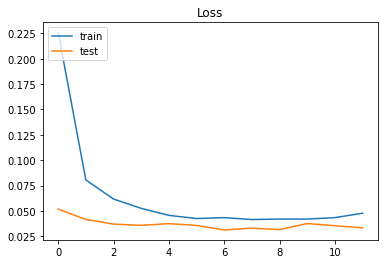

In [7]:
# 入力と出力を指定
im_rows = 28
im_cols = 28
im_color = 1
in_shape = (im_rows, im_cols, im_color)
out_size = 10

# データを28x28=784の一次元配列に変換
X_train = X_train.reshape(-1, im_rows, im_cols, im_color)
X_train = X_train.astype("float32") / 255
X_test = X_test.reshape(-1, im_rows, im_cols, im_color)
X_test = X_test.astype("float32") / 255

# ラベルデータをOne-Hotベクトルに変換
y_train = keras.utils.to_categorical(y_train.astype("int32"), 10)
y_test = keras.utils.to_categorical(y_test.astype("int32"), 10)

# モデルの構造を定義
model = Sequential()
model.add(Conv2D(
    32, 
    kernel_size=(3, 3),
    activation="relu", 
    input_shape=in_shape))
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(out_size, activation="softmax"))

# モデルを構築
model.compile(
    loss="categorical_crossentropy",
    optimizer=RMSprop(),
    metrics=["accuracy"]
)

# 学習を実行
hist = model.fit(X_train, y_train, batch_size=128, epochs=12, verbose=1, validation_data=(X_test, y_test))

# モデルを評価
score = model.evaluate(X_test, y_test, verbose=1)
print(f"正解率={score[1]}, loss={score[0]}")

# 正解率の推移をプロット
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.title("Accuracy")
plt.legend(["train", "test"], loc="upper left")
plt.show()

# ロスの推移をプロット
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("Loss")
plt.legend(["train", "test"], loc="upper left")
plt.show()